In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=cda1e9ef162ef82420fb63d33fcd058d730989e969f2c2c6319673874eb966c5
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


# 需要予測
## 2019年12月の各店舗各商品の売上を予測する
## 提出するCSVは、18店舗×170商品 = 3060行でインデックス・ヘッダ不要

In [ ]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,9
%matplotlib inline

# eが見づらいので、、、
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
sales_hist_df = pd.read_csv('/content/drive/MyDrive/AI Quest/演習④/code/data/sales_history.csv')

In [ ]:
sales_hist_df.tail(10)

,日付,店舗ID,商品ID,商品価格,売上個数
1119560,2019-10-31,7,3300222,3400,1.00
1119561,2019-10-31,1,3300263,3140,1.00
1119562,2019-10-31,15,3400002,1440,1.00
1119563,2019-10-31,17,3400003,1190,1.00
1119564,2019-10-31,8,3400005,1190,1.00
1119565,2019-10-31,8,3400006,2700,1.00
1119566,2019-10-31,7,3400009,1020,1.00
1119567,2019-10-31,7,3400012,510,1.00
1119568,2019-10-31,4,3500001,340,1.00
1119569,2019-10-31,13,3500004,420,1.00


In [ ]:
# 商品IDの重複を排除した行数をカウント
sales_hist_df['商品ID'].nunique()

9040

In [ ]:
# EDAちっくなことを。ユニーク要素の値と出現回数
sales_hist_df['商品ID'].value_counts()

1100038    4722
1100375    4636
1300239    4539
1100354    4256
1900090    4238
           ... 
1002526       1
1001502       1
1300343       1
1900137       1
1000469       1
Name: 商品ID, Length: 9040, dtype: int64

In [ ]:
sales_hist_df.describe()

,店舗ID,商品ID,商品価格,売上個数
count,1119570.00,1119570.00,1119570.00,1119570.00
mean,7.98,1458147.19,1049.43,1.13
std,5.02,569580.50,1257.71,0.79
min,0.00,1000001.00,0.00,-4.00
25%,4.00,1100021.00,340.00,1.00
50%,7.00,1201152.00,680.00,1.00
75%,13.00,1600003.00,1270.00,1.00
max,17.00,3500073.00,523570.00,151.00


In [ ]:
# sales_hist_by_data_shop.isnull().sum()

In [ ]:
item_ctg_df = pd.read_csv('/content/drive/MyDrive/AI Quest/演習④/code/data/item_categories.csv')
ctg_name_df = pd.read_csv('/content/drive/MyDrive/AI Quest/演習④/code/data/category_names.csv')
test_df = pd.read_csv('/content/drive/MyDrive/AI Quest/演習④/code/data/test.csv')
item_ctg_df.head(10)
ctg_name_df.head(10)
test_df.head(10) #TODO: train_dfと同じ形にする 

,index,商品ID,店舗ID
0,0,1000001,0
1,1,1000001,1
2,2,1000001,2
3,3,1000001,3
4,4,1000001,4
5,5,1000001,5
6,6,1000001,6
7,7,1000001,7
8,8,1000001,8
9,9,1000001,9


In [ ]:
# sales_hist_by_data_shop = sales_hist_df.groupby(['日付', '店舗ID']).sum()['売上個数'].reset_index()
# sales_hist_by_data_shop

In [ ]:
# type(sales_hist_by_data_shop)

NameError: ignored

In [ ]:
train_df = pd.merge(sales_hist_df, item_ctg_df, on='商品ID')
train_df = pd.merge(train_df, ctg_name_df, on='商品カテゴリID')
train_df.head(10)
train_df['日付'] = pd.to_datetime(train_df['日付'])
train_df['年月'] = train_df['日付'].dt.strftime('%Y-%m')
train_df['売上'] = train_df['商品価格'] * train_df['売上個数']
train_df.head
# type(pd.to_datetime(sales_hist_df['日付']))

<bound method NDFrame.head of                 日付  店舗ID     商品ID  商品価格  ...  商品カテゴリID    商品カテゴリ名       年月      売上
0       2018-01-01     9  1000001   420  ...       100   映画 - DVD  2018-01  420.00
1       2018-01-01     6  1000001   420  ...       100   映画 - DVD  2018-01  420.00
2       2018-01-01    10  1000001   420  ...       100   映画 - DVD  2018-01  420.00
3       2018-01-02    10  1000001   420  ...       100   映画 - DVD  2018-01  840.00
4       2018-01-02     9  1000001   420  ...       100   映画 - DVD  2018-01  420.00
...            ...   ...      ...   ...  ...       ...        ...      ...     ...
1119565 2019-10-20     6  3300319  3400  ...       330  音楽 - レコード  2019-10 3400.00
1119566 2019-10-20     0  3300319  3400  ...       330  音楽 - レコード  2019-10 3400.00
1119567 2019-10-25     0  3300323  9350  ...       330  音楽 - レコード  2019-10 9350.00
1119568 2019-10-28     1  3300325  2120  ...       330  音楽 - レコード  2019-10 2120.00
1119569 2019-10-30    16  3300324  2040  ...       330  音

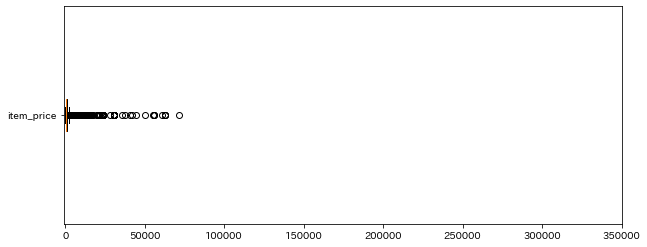

In [ ]:
# trainデータにて、「製品の個数」を箱ひげ図で確認する
fig,ax = plt.subplots(1,1,figsize=(10,4))

# trainデータにて、「商品の価格」を箱ひげ図で確認する
plt.xlim(-1000, 350000)
ax.boxplot((train_df['商品価格']) , labels=['item_price'], vert=False)
plt.show()

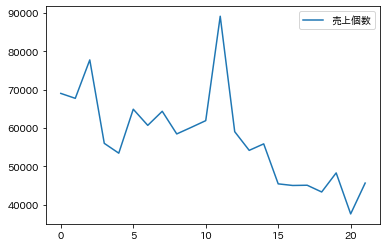

In [ ]:
# train_df.groupby(['年月', '店舗ID']).sum()['売上個数'].reset_index()
train_df.groupby('年月').sum()['売上個数'].reset_index().plot()

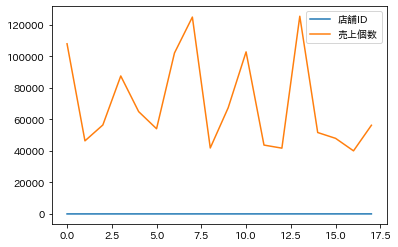

In [ ]:
train_df.groupby('店舗ID').sum()['売上個数'].reset_index().plot()

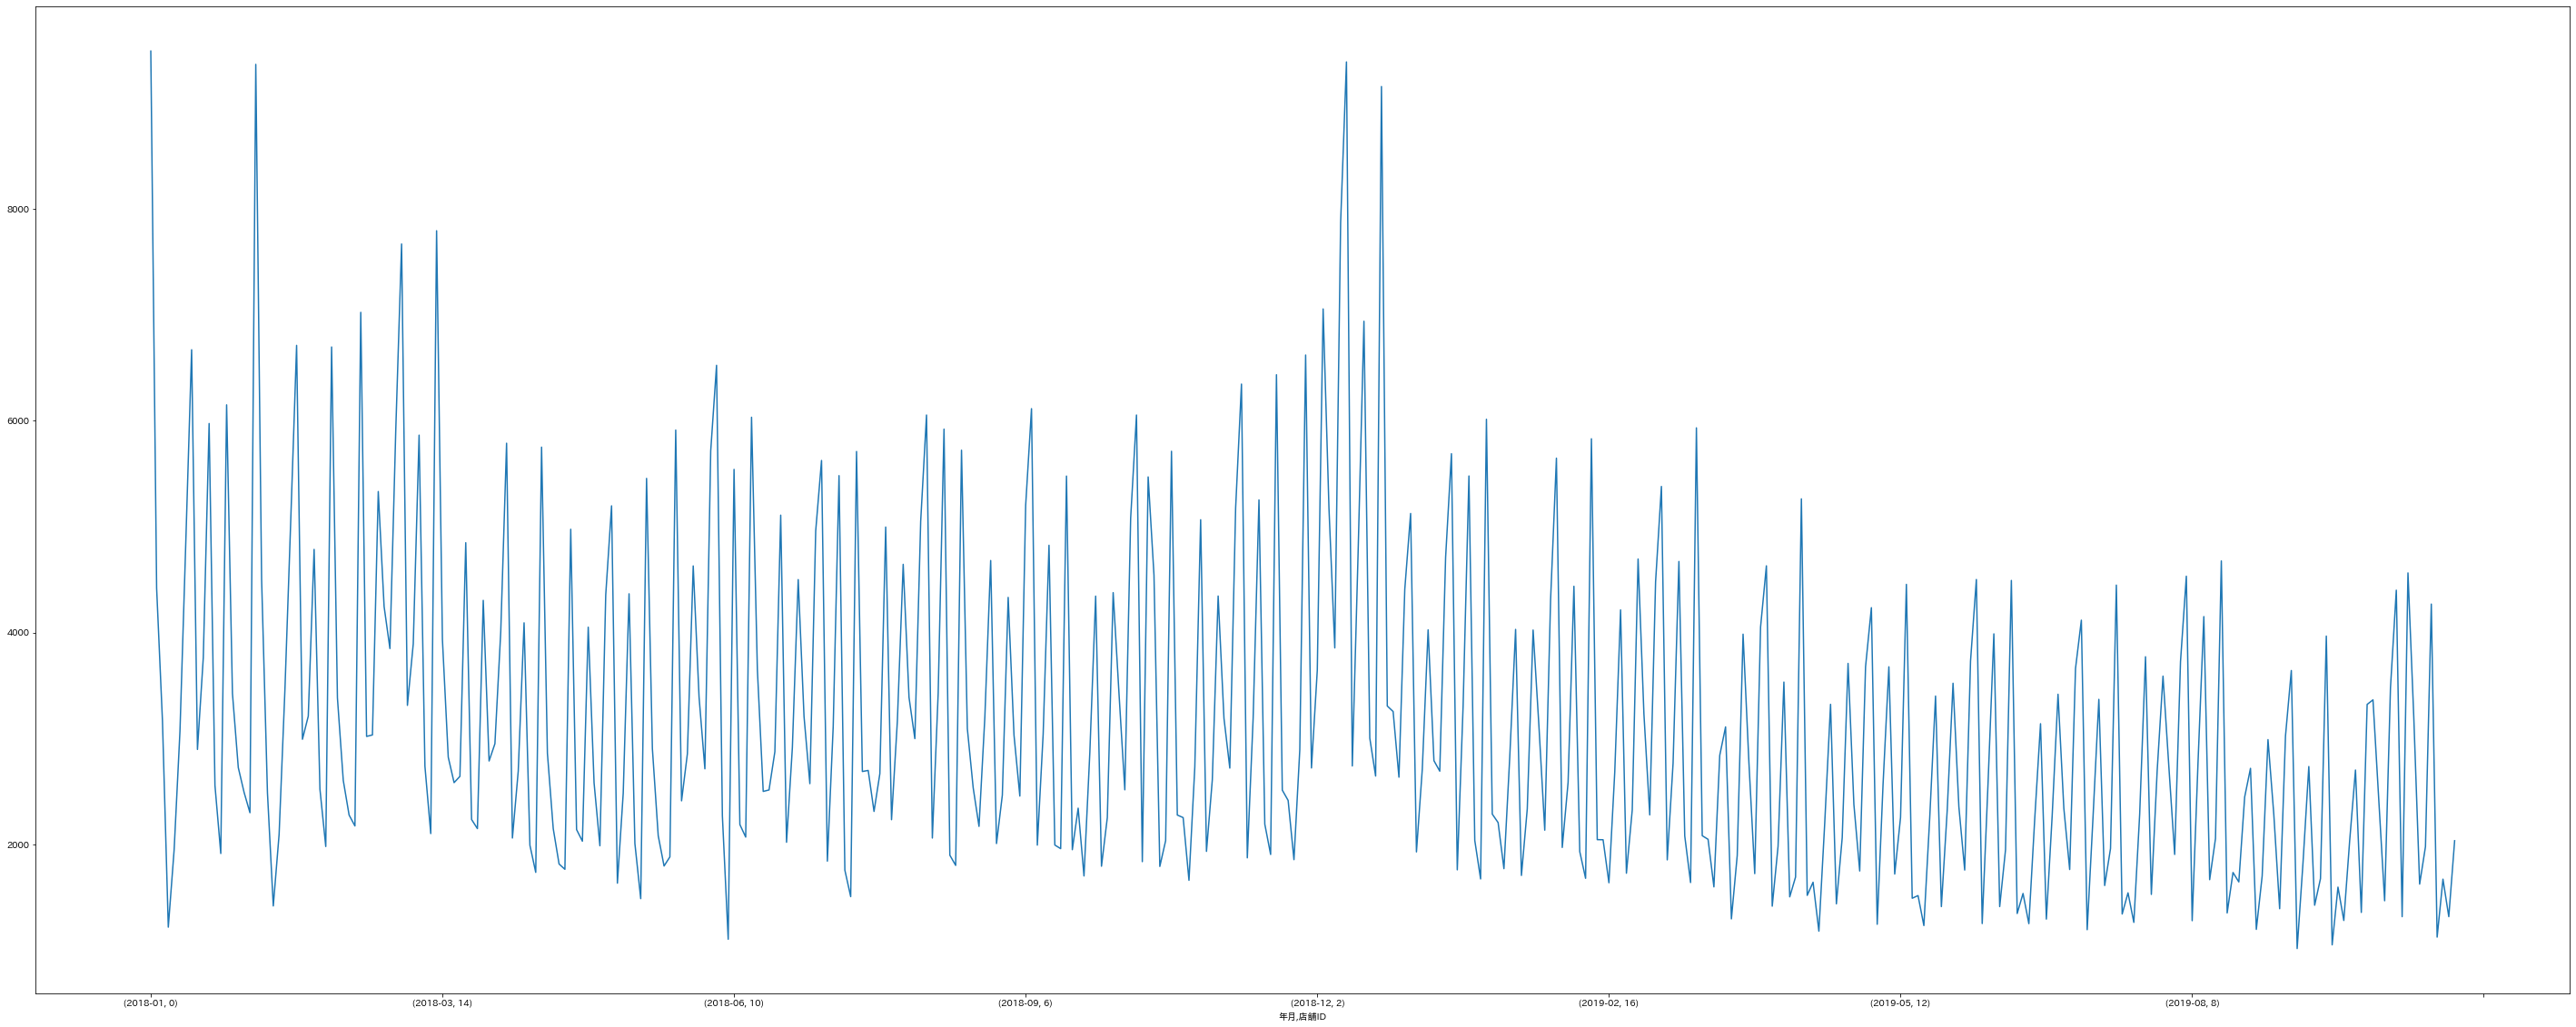

In [ ]:
plt.figure(figsize=[50, 20])
plt.xticks(rotation=90)
train_df.groupby(['年月', '店舗ID']).sum()['売上個数'].plot()

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # LabelEncoderを使って数値化します。
# shops['city_code'] = LabelEncoder().fit_transform(shops['商品カテゴリ名'])
# # shopsの構造を['shop_id', 'city_code']に設定する
# shops = shops[['shop_id','city_code']]

In [ ]:
train_df.dtypes

日付          datetime64[ns]
店舗ID                 int64
商品ID                 int64
商品価格                 int64
売上個数               float64
商品カテゴリID             int64
商品カテゴリ名             object
年月                  object
売上                 float64
dtype: object

In [ ]:
train_df['年月'] = pd.to_datetime(train_df['年月'])

In [ ]:
# sales_hist_by_data_shop.plot()
# sales_hist_by_data_shop.plot.line(figsize=(16, 4))

In [ ]:
## トレーニング用データ整形
### train_df -> (日付	店舗ID	商品ID	商品価格	売上個数	商品カテゴリID	商品カテゴリ名	年月	売上)
### test -> 店舗ID、商品ID
x_train = train_df.drop(['売上個数', '年月', '商品カテゴリ名'], axis=1)
x_train.shape

(1119570, 6)

In [ ]:
from sklearn.model_selection import train_test_split
import datetime as dt

pre_x_train, pre_x_test = train_test_split(x_train, train_size=0.7)
pre_y_train = pre_x_train['売上']
pre_x_train = pre_x_train.drop('売上', axis=1)
print('pre_x_train.shape: ' + str(pre_x_train.shape))
print('pre_y_train.shape: ' + str(pre_y_train.shape))

# よくわからんがdatetimeをnumericに直す? https://stackoverflow.com/questions/60049059/python-linear-regression-typeerror-invalid-type-promotion
pre_x_train['日付'] = pre_x_train['日付'].map(dt.datetime.toordinal)

pre_x_train.shape: (783699, 5)
pre_y_train.shape: (783699,)


In [ ]:
from sklearn.linear_model import LinearRegression as LR #線形回帰モデル

#線回帰モデルの定義
model = LR()

#説明変数と目的変数を設定し、学習
reg = model.fit(pre_x_train, pre_y_train)

#傾きの確認
print('model.coef_: ' + str(model.coef_))

#切片の確認
print('model.intercept_: ' + str(model.intercept_))

#scoreの確認
print('score: ' + str(reg.score(pre_x_train, pre_y_train)))


model.coef_: [-5.91221565e-02 -2.84547918e-01 -9.36502831e-03  1.18347837e+00
  9.23473065e+01]
model.intercept_: 43758.93022290954
score: 0.38630287057298485


In [ ]:
test_df.describe

<bound method NDFrame.describe of       index     商品ID  店舗ID       日付
0         0  1000001     0  2019-12
1         1  1000001     1  2019-12
2         2  1000001     2  2019-12
3         3  1000001     3  2019-12
4         4  1000001     4  2019-12
...     ...      ...   ...      ...
3055   3055  3500001    13  2019-12
3056   3056  3500001    14  2019-12
3057   3057  3500001    15  2019-12
3058   3058  3500001    16  2019-12
3059   3059  3500001    17  2019-12

[3060 rows x 4 columns]>

In [ ]:
## 3060行、日付なし(2019年12月をAttach)
test_df['日付'] = '2019-12'
test_df

,index,商品ID,店舗ID,日付
0,0,1000001,0,2019-12
1,1,1000001,1,2019-12
2,2,1000001,2,2019-12
3,3,1000001,3,2019-12
4,4,1000001,4,2019-12
...,...,...,...,...
3055,3055,3500001,13,2019-12
3056,3056,3500001,14,2019-12
3057,3057,3500001,15,2019-12
3058,3058,3500001,16,2019-12


In [ ]:
sales_hist_df
print(sales_hist_df.nunique())

日付       669
店舗ID      18
商品ID    9040
商品価格     697
売上個数      69
dtype: int64


In [ ]:
del test_reshape_df

## train_df -> (日付	店舗ID	商品ID	商品価格	売上個数	商品カテゴリID
## 商品IDと価格の対応表を作成(sales_hist_dfから商品IDと価格でDISTINCT)
pid_price_list_df = sales_hist_df.loc[:, ['商品ID', '商品価格']].drop_duplicates(subset=['商品ID'])
print(pid_price_list_df.nunique())

## 商品IDとカテゴリIDの対応表を作成
pid_ctg_list_df = item_ctg_df
print(pid_ctg_list_df.nunique())

## train_dfと同じ形にするために結合
test_reshape_df = pd.merge(test_df, pid_price_list_df, how='inner', on='商品ID')
print('\ntest_reshape_dfの中間行数: ' + str(test_reshape_df.count()))
test_reshape_df = pd.merge(test_reshape_df, pid_ctg_list_df,  how='inner', on='商品ID')
test_reshape_df.reset_index(inplace=True, drop=True)
x_test = test_reshape_df.iloc[:, 1:]
x_test = x_test[['日付', '店舗ID', '商品ID', '商品価格', '商品カテゴリID']]
x_test

商品ID    9040
商品価格     354
dtype: int64
商品ID        9426
商品カテゴリID      26
dtype: int64

test_reshape_dfの中間行数: index    3060
商品ID     3060
店舗ID     3060
日付       3060
商品価格     3060
dtype: int64


,日付,店舗ID,商品ID,商品価格,商品カテゴリID
0,2019-12,0,1000001,420,100
1,2019-12,1,1000001,420,100
2,2019-12,2,1000001,420,100
3,2019-12,3,1000001,420,100
4,2019-12,4,1000001,420,100
...,...,...,...,...,...
3055,2019-12,13,3500001,420,350
3056,2019-12,14,3500001,420,350
3057,2019-12,15,3500001,420,350
3058,2019-12,16,3500001,420,350


In [ ]:
## 予測
x_test['日付'] = pd.to_datetime(x_test['日付'])
x_test['日付'] = x_test['日付'].map(dt.datetime.toordinal)
predict = model.predict(x_test)
predict

array([1607.21665187, 1606.93210395, 1606.64755604, ..., 1277.20428173,
       1276.91973381, 1276.63518589])

In [ ]:
type(predict)

numpy.ndarray

In [ ]:
# predict.to_csv('submission.csv', index=False, header=False)
np.savetxt('submission.csv', predict, fmt='%d')

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>